 # Лабораторная работа №1. 
  ## Задача о падении тела. Построение графиков функций                                       

*Богдановия Екатерина 07.03.2025*

**Задание 1.1. Задача о падении тела**

**Описание процесса**.
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через
время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и
высоте $h_{end}$

**Предположения**.
- Тело будем считать материальной точкой массы $m$.
тяжести $${\bf F} = m (0,-g),$$ где $m$ -- масса тела, $g$ -- ускорение
свободного падения.
- Сопротивлением среды пренебрегаем.

**Данные**.
- Задача рассматривается при следующих значениях параметров: $h_{start}$ = 1 m,
 $h_{end}$ = 3m, $T$ = 3 s, $s_{end}$ = 5 m.
- Угол запуска тела не известен.
- Начальный момент времени движения тела полагаем равным нулю:$t$ = 0 .
- Значение массы тела $m$ не повлияет на функции перемещения тела.
  **Задания для выполнения**.
- Определите функцию перемещения тела $(s_{x}(t), s_{y}(t))$ под
действием силы тяжести, где $s_{x}(t)$ и $s_{y}(t)$ — горизонтальная и вертикальная
составляющая положения тела в момент времени $t$, соответственно.
- Найдите угол запуска тела $\alpha$.
- Постройте график траектории движения тела $(s_{x}(t), s_{y}(t))$ для $t ∈ [0, T]$

In [4]:
!pip3 install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 415.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 478.6 kB/s eta 0:00:0000:0100:01


In [1]:
import math

In [2]:
math.sin(math.pi/2)

1.0

In [5]:
import numpy as np 

In [7]:
import matplotlib.pyplot as plt

In [8]:
import scipy.constants as const

In [9]:
import sympy

**Переменные** создаются при первом присваивании им значений. Слева от
оператора присваивания ( = ) записывается переменная, справа — выражение,
результатом вычисления которого является объект: переменная = объект . Имена
переменных рекомендовано задавать в нижнем регистре с использованием знака
нижнего подчеркивания для смыслового разделения имени на части, например
$first_variable = 1$ . Объявлять переменные перед их инициализацией не нужно.
После присваивания всякий раз, когда переменная появляется в коде, она
заменяется на объект, на который ссылается. Нельзя использовать переменную,
которой не присвоено значение.

In [10]:
hStart = 1
hEnd = 3.0E+0
t = 3.0
sEnd  = 5.0e0
print(hStart, hEnd, sEnd)

1 3.0 5.0


In [11]:
print(hStart, hEnd)

1 3.0


Примеры некоторых физических констант из модуля **constant** пакета расширений **scipy**. Магнетон Бора (**$\mu_{B}$**), масса дейтрона (ядра изотопа водорода дейтерия **$M_{d}$**), постоянная Больцмана (**k**). 

In [12]:
import scipy.constants as const
print(const.value('Bohr magneton'), const.unit('Bohr magneton'))
print(const.value('deuteron mass'), const.unit('deuteron mass'))
print(const.value('Boltzmann constant'), const.unit('Boltzmann constant'))

9.2740100657e-24 J T^-1
3.3435837768e-27 kg
1.380649e-23 J K^-1


In [13]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

In [14]:
step = 0.01
tList = [0 + i*step for i in range(int(t/0.01))]
tArray = np.arange(0,t,step)

**Спецификация функции *range(start, end, step)***. Функция **range** предназначена для создания целочисленных последовательностей, содержащих арифметическую прогрессию (если $step < 0$ — убывающую, при $step > 0$ — возрастающую). Аргументы функции **start, end, step** обязательно должны быть числами типа **int**, причём **step $\not=0$**.

При вызове функции в полной форме, а именно **range(start, end, step)** будет возвращем список, состоящий из чисел от **start** до **end - 1** с шагом **step**. Если при вызове будет опущен аргумент **start**, то по умолчанию он будет равен **0**; если опущен аргумент **step**, то его значение по умолчанию будет равно **0**. <br>
Таким образом полная форма возвращаемого списка имеет следующий вид:
$$[start, start + step, start + 2 * step, ..., end - step]$$
**Спецификация функции *np.arange(start, end, step)***. Функция **arange**, из пакета **NumPy**, возвращает массив **(ndarray — основной объект пакета NumPy)** равномерно распределенных чисел из заданного интервала. Аргументы функции **start, end, step** могут быть как типа **int**, так и типа **float**. причём **step $\not=0$**.

При вызове функции в полной форме, а именно **np.arange(start, end, step)** будет возвращем массив, состоящий из чисел лежащих на полуинтервале [**start**, **end**) с шагом **step**. Если при вызове будет опущен аргумент **start**, то по умолчанию он будет равен **0**; если опущен аргумент **step**, то его значение по умолчанию будет равно **0**. <br>

**Получение аналитического вида функции перемещения.** Запишем второй закон Ньютона:
\begin{align}F = ma\end{align}
Так как проекции ускорения на оси $\bf Ox$ и $\bf Oy$ равна $\bf a = (s_x^{''}(t), s_y^{''}(t))$, а также проекции приложенной силы равны $\bf F=(0;-mg)$, то формула примет вид:
$$\bf (0; -mg) = m * (s_x^{''}(t), s_y^{''}(t))$$
Или, если записывать в виде системы:
\begin{equation}
    \begin{cases}
      \bf m * s_x^{''}(t) = 0\\
      \bf m * s_y^{''}(t) = -mg
    \end{cases}\,\Rightarrow
    \begin{cases}
      \bf s_x^{''}(t) = 0\\
      \bf s_y^{''}(t) = -g
    \end{cases}\
\end{equation}
Так как $\bf s_x^{''}(t) = a_x$, то, если последовательно проделать интегрирование по $\bf dt$ — мы получим формулу для нахождения $\bf s_x(t)$. 

*первый неопределенный интеграл:*

$$\bf s_x^{'}(t) = \int{s_x^{''}(t) dt} = \int{0 dt} = C_{x_1}$$
$\bf C_{x_1} = v_{0x}$. Тогда:
$$\bf s_x^{'}(t) = v_{0x}$$
Теперь второй раз проинтегрируем полученное выражение:
$$\bf s_x(t) = \int{s_x^{'}(t) dt} = \int{v_{0x} dt} = v_{0x}t + C_{x_2}$$
Тогда, по условию можно найти, чему равно $\bf C_{x_2}$:
$$\bf s_{x0}(0) = 0 \\ $$
$$\bf \Rightarrow v_{0x} * 0 + C_{2} = 0$$
$$\bf C_{2} = 0$$
Значит проекция перемещения на ось $\bf Ox$ равна:
$$\bf s_{x}= v_{0x}t$$

*Аналогичные действия проделаем и для второго уравнения.*

$$\bf s_y^{'}(t) = \int{s_y^{''}(t) dt} = \int{-g dt} = -gt + C_{y_1} = [C_{y_1} = v_{0y}] = -gt + v_{0y}$$
$$\bf s_y(t) = \int{s_y^{'}(t) dt} = \int{-gt + v_{0y} dt} = v_{0y}t-\frac{gt^2}{2} + C_{y_2}$$
Также из услови:
$$\bf s_y(0) =  v_{0y} * 0 -\frac{g * 0^2}{2} + C_{y_2}$$
$$\bf \Rightarrow h_{start} = C_{y_2}$$
И это значит, что проекция перемещения на ось $\bf Oy$ равна:
$$\bf s_y(t) = h_{start} + v_{0y}t-\frac{gt^2}{2}$$

In [15]:
v0x = sEnd/t
v0x

1.6666666666666667

In [16]:
v0y = (hEnd-hStart+g/2*t**2)/t
v0y

15.376641666666666

In [17]:
alpha = math.atan(v0y/v0x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

In [18]:
f'sx(t) = {v0x} t'

'sx(t) = 1.6666666666666667 t'

In [19]:
f'sy(t) = {hStart} + {v0y:.6} t - {g:.6}/2*t\N{superscript two}'

'sy(t) = 1 + 15.3766 t - 9.80665/2*t²'

 Построение графиков функций осуществляется по координатам точек графика. Для
 этого нужно создать последовательность значений -координат точек графика
 x
функции и последовательность соответствующих значений -координат точек
 графика функции.

In [20]:
tList, tArray;
sXList = [v0x * t for t in tList]
sYList = [hStart + v0y * t - g * t ** 2 / 2 for t in tList]

In [21]:
sXArray = v0x * tArray
sYArray = hStart + v0y * tArray - g * tArray ** 2 / 2

(np.float64(0.0), np.float64(5.0), np.float64(0.0), np.float64(14.0))

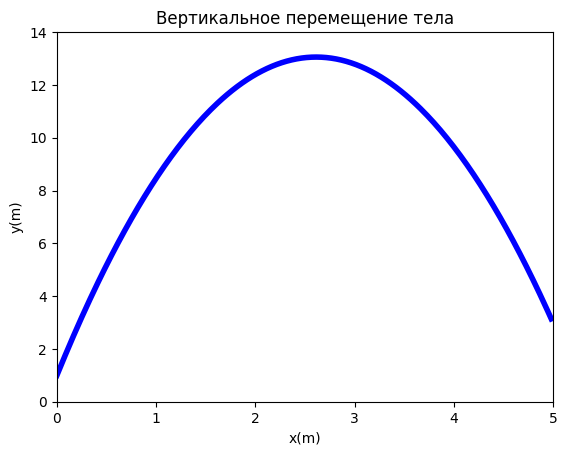

In [22]:
plt.figure()
plt.plot(sXList, sYList, 'b-', lw = 4)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x(m)'); plt.ylabel('y(m)')
plt.axis([0, sEnd, 0, hEnd + 11])

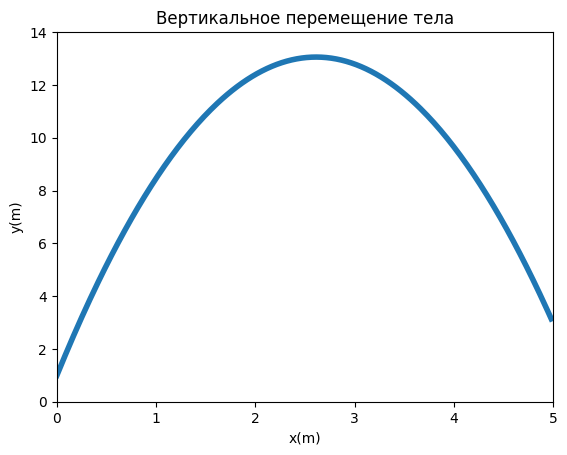

In [23]:
plt.figure()
plt.plot(sXArray, sYArray, lw = 4)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x(m)'); plt.ylabel('y(m)')

plt.xlim(0, sEnd), plt.ylim(0, hEnd + 11);

**Задание 1.2. Определение момента времени касания телом земли**


Для задачи о падении тела из Задания 1.1 найдите момент времени касания телом
земли (время нахождения тела в воздухе).

Выполнение задания осуществите на основе двух подходов.

Подход 1 (**точное решение**): время касания телом земли находим как точное
решение уравнения $s_{y}$ $(t)$ = 0;

Подход 2 (**приближенное решение**)
- Постройте последовательность $s_{y}$ на временном отрезке $[0,tstop
]$, чтобы
момент касания тела земли $t∗$
 попадал в выбранный отрезок, т.е. $t ∗ ∈ [0,tstop]$.
Отметим, что $t_{stop}$ > $T$, где значение $T$ задается в Задании 1.1.
- Найдите в построенной последовательности два соседних элемента
последовательности, значения которых меняют знак. Т. е. найдите значение
индекса , для которого . Это будет означать, что
.
- Постройте прямую линию , проходящую через две точки и
 и найдите значение из условия
. Найденное значение , будет соответствовать точке на
прямой . в документе формулы для прямой
 и для вычисления .
найдите
sy(t) = 0
sy
[0,tstop
]
t
∗
t
∗ ∈ [0,tstop]
tstop > T T
sy
k sy
[k]sy
[k + 1] < 0
0 ∈ (sy[k], sy[k + 1])
slin(t) (t[k], sy
[k])
(t[k + 1], sy[k + 1]) t
∗ ∈ (t[k],t[k + 1])
slin(t
∗) = 0 t
∗ (t
∗
, 0)
slin(t) \color{red}\text{Приведите}
slin(t) t
∗
 точное решение (Подход 1) и приближенное решение
(Подход 2), вычислив относительную ошибку.

 Для решения алгебраического уравнения 
solve из модуля 
sy(t) = 0
 воспользуемся функцией
 sympy , которая предназначена для решения алгебраических
 уравнений и систем уравнений. Для выполнения функции 
solve предварительно с
 помощью функции 
symbols необходимо создать **символьную переменную**,
 относительно которой будет определено уравнение.

#### Подход №1

In [24]:
import sympy
T = sympy.symbols('t')

result = sympy.solve(hStart + v0y * T - g * T ** 2 / 2, T)

for step, line in enumerate(result):
    print(f"{line}")

-0.0637382309488101
3.19970039267921


In [25]:
tStartExact = result[-1]
print(f"Решение относительно t: {tStartExact}")

Решение относительно t: 3.19970039267921


**Спецификация функции *sympy.Symbol(name)***. Функция **Symbol** предназначена для создания символьных переменных, которые в дальнейшем используются в математических выражениях, уравнениях, полиномах и т.д. Аргумент **name** обязательно должен иметь тип данных **str**.

**Спецификация функции *sympy.solve(f, symbol, [flags])***. Функция **solve** используется для решения алгебраических уравнений, а также систем уравнений, матриц и т.д.

*Аргументы функции Solve:*

**f** — аргумент, указывающий, что будет решать функция: уравнение, систему уравнений, матрицы и т.д;<br>
**symbol** — символ (-ы) отночительно которого (-ых), будет предоставлено решение; <br>
**flags** — является необязательным аргументом, расширяет возможности вывода и способов тестирования функции **solve**.

#### Подход №2

Уравнение прямой, проходящей через две точки:

$$\bf\frac{x - x_{1}}{x_{2} - x_{1}}=\frac{y - y_{1}}{y_{2} - y_{1}} \Rightarrow (x - x_{1})(y_{2} - y_{1})=(x_{2} - x_{1})(y - y_{1})$$

Для точки ($\bf t^*, 0$) уравнение примет вид:

$$\bf(t^* - x_{1})(y_{2} - y_{1})=(x_{2} - x_{1})y_{1}\Rightarrow t^* = \frac{(x_{2} - x_{1})y_{1}}{y_{2} - y_{1}} + x_{1}$$

где, $\bf(x_{1}, y_{1}) = (t[k], s_{y}[k])$ и, соответственно, $\bf(x_{2}, y_{2}) = (t[k + 1], s_{y}[k + 1])$.

In [26]:
timeSeqStep, step = 1e-8, 0
timeSeq = np.arange(t, t + 1, timeSeqStep)

ySeq = hStart + v0y * timeSeq - g * timeSeq ** 2 / 2
while True:
    if ySeq[step] * ySeq[step + 1] < 0:
        print(f"№ шага: {step}; ySeq[step]: {ySeq[step]}; ySeq[step + 1]: {ySeq[step + 1]}")
        break
    step += 1

x1, y1 = timeSeq[step], ySeq[step]
x2, y2 = timeSeq[step + 1], ySeq[step + 1]
tSolvingTheEquation = (x2 - x1) * y1 / (y2 - y1) + x1 

print(f"\nРешение: {tSolvingTheEquation}")

№ шага: 19970039; ySeq[step]: 6.229260662848901e-08; ySeq[step + 1]: -9.772439568678237e-08

Решение: 3.1997003848934527


In [27]:
tStartExact - tSolvingTheEquation

7.78575470761211e-9

При сравнении стоит отметить, что чем меньше значение **timeSeqStep** (т.е шаг времени), тем точнее мы получим результат. В сулечае, когда **timeSeqStep = $10^{-8}$** погрешность (относительная ошибка) будет составлять всего:

$$\epsilon = tStartExact - tSolvingTheEquation \approx 7.7857547 * 10^{-9}$$

**Задание 1.3. Построение секущей, касательной и нормали к графику
функции** 

Секущая

In [28]:
directStart = np.array([sXArray[0], sYArray[0]])
directEnd = np.array([sXArray[-1], sYArray[-1]])

t1, t2 = -1, 2
aVector = directEnd - directStart
pointAB = [[(directStart + aVector * (t1))[step], (directStart + aVector * (t2))[step]] for step in range(2)]

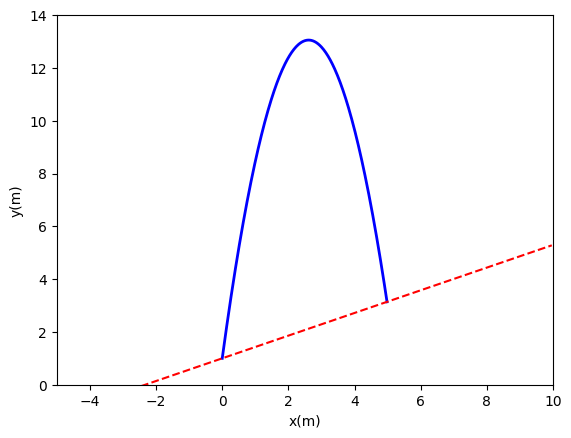

In [29]:
fig = plt.figure()
plt.plot(sXArray, sYArray, 'b-', lw = 2) 
plt.plot(pointAB[0], pointAB[1], '--', color = 'red', lw = 1.5)
plt.xlabel('x(m)'); plt.ylabel('y(m)')

plt.axis([-5, sEnd + 5, 0, hEnd + 11]);

Касательная
Уравнение касательной выглядит следующим образом:
$$y-y_{0}=k\left(x-x_{0}\right)$$
Для того, чтобы найти угловой коэффициент $k$ касательной к графику полета тела в точке $(x_{start}, y_{start})$ и $t=0$, нужно:
1. Найти производные проекций перемещения по осям $Ox$ и $Oy$;
2. Из геометрического смысла тангенса следует, что 
$$tg\alpha = k = \frac{s_{y}^{'}(0)}{s_{x}^{'}(0)}=\frac{v_{0y} - g *0}{v_{0x}}\Rightarrow tg\alpha=\frac{v_{0y}}{v_{0x}}$$

Дальше по аналогии с прошлым заданием строим уравнение прямой и ищем две точки, принадлежащие ей. Приступим к реализации кода:

In [30]:
coeff = v0y / v0x

startPoint = np.array([-10, 10])
tanYArray = coeff * (startPoint - sXArray[0]) + sYArray[0]

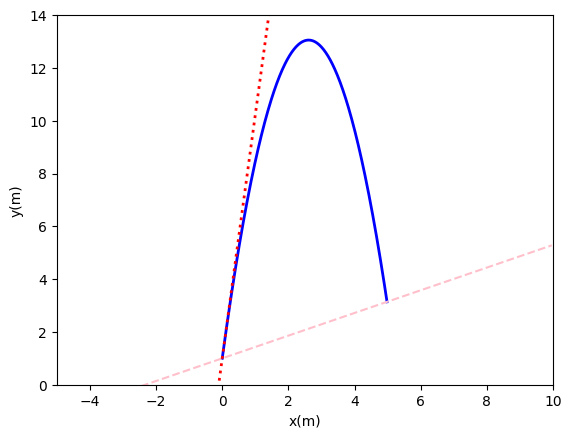

In [31]:
fig = plt.figure()
plt.plot(sXArray, sYArray, 'b-', lw = 2) 
plt.plot(pointAB[0], pointAB[1], '--', color = 'pink', lw = 1.5)
plt.plot(startPoint, tanYArray, 'r:', lw = 2) 
plt.xlabel('x(m)'); plt.ylabel('y(m)')

plt.axis([-5, sEnd + 5, 0, hEnd + 11]);

Нормаль
Уравнение нормали к касательной:
$$\bf y-y_{0}=k\left(x-x_{0}\right)$$
$$\bf \Rightarrow y-y_{0}=-\frac{1}{y^{\prime}\left(x_{0}\right)}\left(x-x_{0}\right)$$

Тут все правктически аналогично: берем коэффициент из уравнени касательной и подставляем в уравнение нормали (это следует из условия перпендикулярности прямых $\bf k_{1}k_{2}=-1$)

In [32]:
normCoeff = - 1 / coeff
normYArray = normCoeff * (startPoint - sXArray[0]) + sYArray[0]

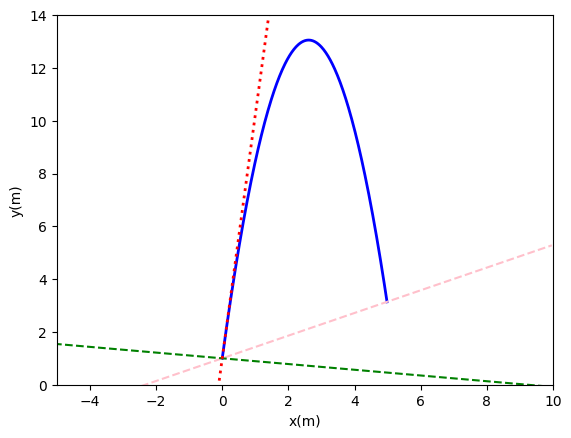

In [33]:
fig = plt.figure()
plt.plot(sXArray, sYArray, 'b-', lw = 2) 
plt.plot(pointAB[0], pointAB[1], '--', color = 'pink', lw = 1.5)
plt.plot(startPoint, normYArray, 'g--', lw = 1.5) 
plt.plot(startPoint, tanYArray, 'r:', lw = 2) 
plt.xlabel('x(m)'); plt.ylabel('y(m)')

plt.axis([-5, sEnd + 5, 0, hEnd + 11]);

**Задание 1.4. Построение графиков функций**

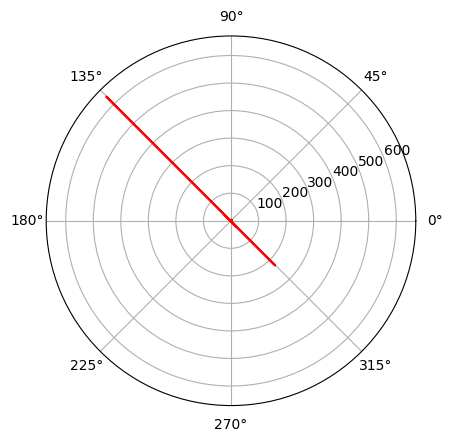

In [34]:
plt.figure()
plt.axes(projection='polar')

phi = np.arange(0, 2 * np.pi, 0.05)
a = 2
r = (3 * a * np.sin(phi) * np.cos(phi)) / ((np.sin(phi))**3 + (np.cos(phi))**3)
plt.plot(phi + (r < 0)*np.pi,abs(r),'r-')

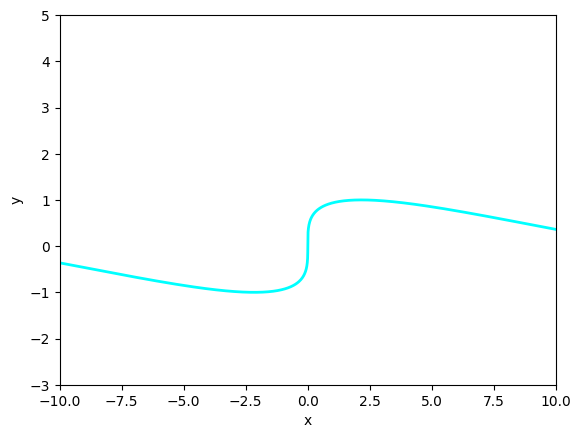

In [35]:
t = np.arange(-10, 10, 0.01)

x = (3 * t **2 +1) / 3 * t **3

y = np.sin(t**3/3 + t)

fig = plt.figure()
plt.plot(x, y , '-', color = 'cyan', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-10, 10, -3, 5])
plt.show()